In [78]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [79]:
#Reading dataset 
data=pd.read_csv(r"/content/competitor_influencer_similarity.csv", low_memory=False)

In [80]:
data.head()

,competitor_name,influencer_name,similarity_score
0,bulk,aaroncgshore,0.052173
1,bulk,adamcollard,0.112365
2,bulk,aliceliveing,0.105055
3,bulk,brown.elle,0.031806
4,bulk,charlottedawsy,0.096758


In [ ]:
# select all data that contain a specific competitor
filtered_data=data[data['competitor_name'].str.contains('liveinnermost')]
filtered_data

In [85]:
x = filtered_data.iloc[:, [2]]

In [ ]:
x  = np.array(x)
x

In [87]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
     }

In [88]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 12):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(x)
  score = silhouette_score(x, kmeans.labels_)
  silhouette_coefficients.append(score)

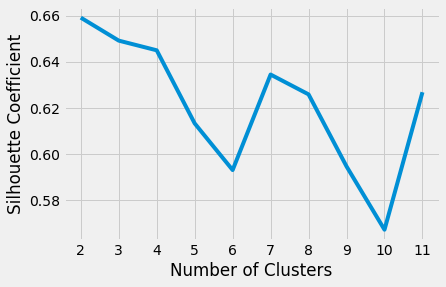

In [89]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [90]:
#K-means clustering
kmeans_model = KMeans(n_clusters=3,  random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

In [ ]:
#Forming the cluster column
filtered_data['Cluster'] = kmeans_predict
filtered_data

In [ ]:
filtered_data.sort_values(
    by="Cluster",
    ascending=True
    )

In [96]:
filtered_data['Cluster'].value_counts()

0    15
1    14
2     1
Name: Cluster, dtype: int64

### Backfill 2020-09-03
- Focus: **Influencer**
- Add visualization for Influencer
